In [1]:
from nilearn import surface
from scipy import stats

import matplotlib.pyplot as plt
import nilearn
import numpy as np
import os
import pandas as pd
import pingouin as pg
import seaborn as sns

# Preprocessing

Please contact the corresponding author, Sungshin Kim (sungshinkim@hanyang.ac.kr), or the first author, Junghyun Kim (juhng62@gmail.com) to get raw data.

In [2]:
index_dir = '../index'

subj_list = np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str')

label_dir = '../label/visual'
label_early = nilearn.surface.load_surf_data(os.path.join(label_dir, 'lh.wang2015atlas.V1+2+3d+1+2+3v.label'))
label_V3AB = nilearn.surface.load_surf_data(os.path.join(label_dir, 'lh.wang2015atlas.V3A+B.label'))
label_IPS0 = nilearn.surface.load_surf_data(os.path.join(label_dir, 'lh.wang2015atlas.IPS0.label'))
label_list = [label_early, label_V3AB, label_IPS0]
ROI_list = ['Early', 'V3AB', 'V7']
cond_list = ['CF', 'BF']

In [3]:
# df_fig3B = pd.DataFrame()

# subj_col = [subj for subj in subj_list for _ in range(0, len(label_list)*len(cond_list))]
# df_fig3B['subj'] = subj_col

# label_col = [label for label in ROI_list for _ in range(2)] * len(subj_list)
# df_fig3B['label'] = label_col

# cond_col = cond_list * len(label_list) * len(subj_list)
# df_fig3B['cond'] = cond_col

# # df_fig3B

In [4]:
# beta_col = []

# for subj in subj_list:
#     beta_dir = beta_dir = f'/Users/clmn/Desktop/GL_FS/GLFS02/{subj}/main/GLanalysis02.lh'
    
#     for label in label_list:
        
#         for cond in cond_list:
#             if cond == 'CF':
#                 beta = nilearn.surface.load_surf_data(os.path.join(beta_dir, 'beta.nii.gz'))[:, 0]
#             else :
#                 beta = nilearn.surface.load_surf_data(os.path.join(beta_dir, 'beta.nii.gz'))[:, 1]
            
#             beta_sum = 0
            
#             for i_label in label:
#                 beta_sum += beta[i_label]
            
#             beta_col.append(beta_sum/len(label))

# # print(len(beta_col))

# df_fig3B['beta'] = beta_col

# df_fig3B

In [5]:
# df_fig3B.to_csv('../data/beta_visual.csv', index=False)

In [6]:
df_fig3B = pd.read_csv('../data/beta_visual.csv')
df_fig3B

,subj,label,cond,beta
0,GL03,Early,CF,0.942024
1,GL03,Early,BF,0.815868
2,GL03,V3AB,CF,0.884368
3,GL03,V3AB,BF,0.557036
4,GL03,V7,CF,1.502452
...,...,...,...,...
139,GL29,Early,BF,0.472490
140,GL29,V3AB,CF,0.516403
141,GL29,V3AB,BF,0.008751
142,GL29,V7,CF,1.076899


# Figure 3 B

## Graph

In [7]:
def annot_stat_hor(star, x1, x2, y, h, col='k', ax=None):
    ax = plt.gca() if ax is None else ax
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color=col)

In [8]:
def annot_stat_ver_left(star, y1, y2, x, w, col='k', ax=None):
    ax = plt.gca() if ax is None else ax
    ax.plot([x, x+w, x+w, x], [y1, y1, y2, y2], lw=1.5, c=col)
    ax.text(x+w*1.5, (y1+y2)*.515, star, ha='center', va='center', rotation=90, color=col)

In [9]:
def annot_stat_ver_right1(star, y1, y2, x, w, col='k', ax=None):
    ax = plt.gca() if ax is None else ax
    ax.plot([x, x+w, x+w, x], [y1, y1, y2, y2], lw=1.5, c=col)
    ax.text(x+w*2, (y1+y2)*.46, star, ha='left', va='center', rotation=90, color=col)

In [10]:
def annot_stat_ver_right2(star, y1, y2, x, w, col='k', ax=None):
    ax = plt.gca() if ax is None else ax
    ax.plot([x, x+w, x+w, x], [y1, y1, y2, y2], lw=1.5, c=col)
    ax.text(x+w*2, (y1+y2)*.54, star, ha='left', va='center', rotation=90, color=col)

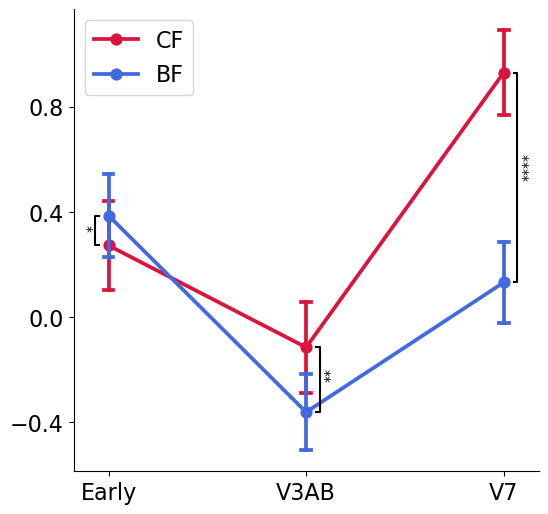

In [11]:
plt.figure(figsize=(6,6))

ax = sns.pointplot(
    data=df_fig3B, x='label', y='beta', hue='cond', 
    errorbar=("se", 1), capsize=0.05, 
    palette=['crimson', 'royalblue']
)

for text, new in zip(ax.legend(fontsize=16).texts, ['CF', 'BF']):
    text.set_text(new)

# ax.set_xlabel('', fontsize=18)
# ax.set_ylabel('Activation (a.u.)', fontsize=18)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.yticks(np.arange(-0.4, 1.1, 0.4))

ax.tick_params(axis='x', top=False, labelbottom=True)
ax.tick_params(axis='y', labelsize=16)

# for line in ax.lines:
#     print(line.get_ydata())

annot_stat_ver_left("*", ax.lines[0].get_ydata()[0], ax.lines[4].get_ydata()[0], 0-0.05, -0.02, col='k', ax=None)
annot_stat_ver_right1("**", ax.lines[0].get_ydata()[1], ax.lines[4].get_ydata()[1], 1+0.05, 0.02, col='k', ax=None)
annot_stat_ver_right2("****", ax.lines[0].get_ydata()[2], ax.lines[4].get_ydata()[2], 2+0.05, 0.02, col='k', ax=None)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# fname = '../figures/fig3B.png'
# plt.savefig(fname, dpi=600)
# plt.close()

### With individual data points

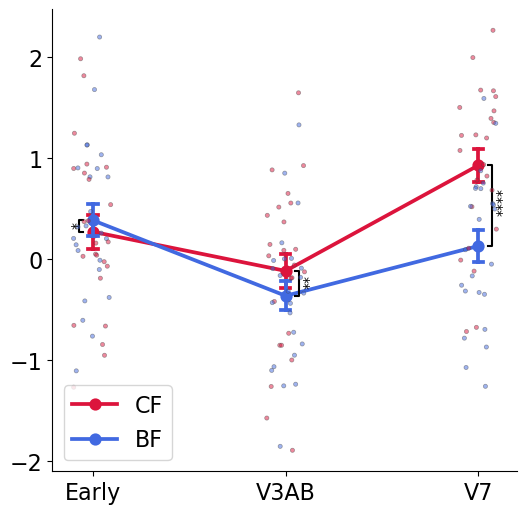

In [12]:
plt.figure(figsize=(6,6))

ax = sns.pointplot(
    data=df_fig3B, x='label', y='beta', hue='cond', 
    errorbar=("se", 1), capsize=0.05, 
    palette=['crimson', 'royalblue']
)

sns.stripplot(
    data=df_fig3B, x='label', y='beta', hue='cond', 
    dodge=False, palette=['crimson', 'royalblue'],
    size=3, 
    jitter=True, 
    alpha=0.5, 
    marker='o', 
    edgecolor='auto', 
    linewidth=0.5, 
    ax=ax, legend=False
)

for text, new in zip(ax.legend(fontsize=16).texts, ['CF', 'BF']):
    text.set_text(new)

# ax.set_xlabel('', fontsize=18)
# ax.set_ylabel('Activation (a.u.)', fontsize=18)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.yticks(np.arange(-0.4, 1.1, 0.4))

ax.tick_params(axis='x', top=False, labelbottom=True)
ax.tick_params(axis='y', labelsize=16)

# for line in ax.lines:
#     print(line.get_ydata())

annot_stat_ver_left("*", ax.lines[0].get_ydata()[0], ax.lines[4].get_ydata()[0], 0-0.05, -0.02, col='k', ax=None)
annot_stat_ver_right1("**", ax.lines[0].get_ydata()[1], ax.lines[4].get_ydata()[1], 1+0.05, 0.02, col='k', ax=None)
annot_stat_ver_right2("****", ax.lines[0].get_ydata()[2], ax.lines[4].get_ydata()[2], 2+0.05, 0.02, col='k', ax=None)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# fname = '../figures/fig3B.png'
# plt.savefig(fname, dpi=600)
# plt.close()

## Statistics

### T-test

In [13]:
a = df_fig3B[(df_fig3B["cond"] == 'CF') & (df_fig3B["label"] == 'Early')].groupby('subj')['beta'].mean()
b = df_fig3B[(df_fig3B["cond"] == 'BF') & (df_fig3B["label"] == 'Early')].groupby('subj')['beta'].mean()
stats.ttest_rel(a, b)

TtestResult(statistic=-2.709306576090804, pvalue=0.012511758540268725, df=23)

In [14]:
a = df_fig3B[(df_fig3B["cond"] == 'CF') & (df_fig3B["label"] == 'V3AB')].groupby('subj')['beta'].mean()
b = df_fig3B[(df_fig3B["cond"] == 'BF') & (df_fig3B["label"] == 'V3AB')].groupby('subj')['beta'].mean()
stats.ttest_rel(a, b)

TtestResult(statistic=3.456218684376874, pvalue=0.002144909012095771, df=23)

In [15]:
a = df_fig3B[(df_fig3B["cond"] == 'CF') & (df_fig3B["label"] == 'V7')].groupby('subj')['beta'].mean()
b = df_fig3B[(df_fig3B["cond"] == 'BF') & (df_fig3B["label"] == 'V7')].groupby('subj')['beta'].mean()
stats.ttest_rel(a, b)

TtestResult(statistic=11.980631079553575, pvalue=2.2825890111514347e-11, df=23)

### 2 way rm ANOVA

In [16]:
index_dir = '../index'

df_rm = pd.DataFrame()

df_rm['subj'] = np.tile(np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str'), 6)

df_rm['cond'] = np.repeat(np.array(['CF', 'BF']), 72)

df_rm['label'] = np.tile(np.repeat(np.array(['4a', '4p']), 24), 3)

df_rm['beta'] = np.concatenate((np.array(df_fig3B[(df_fig3B["cond"] == 'CF') & (df_fig3B["label"] == 'Early')].groupby('subj')['beta'].mean()), 
                                np.array(df_fig3B[(df_fig3B["cond"] == 'CF') & (df_fig3B["label"] == 'V3AB')].groupby('subj')['beta'].mean()), 
                                np.array(df_fig3B[(df_fig3B["cond"] == 'CF') & (df_fig3B["label"] == 'V7')].groupby('subj')['beta'].mean()),
                                np.array(df_fig3B[(df_fig3B["cond"] == 'BF') & (df_fig3B["label"] == 'Early')].groupby('subj')['beta'].mean()), 
                                np.array(df_fig3B[(df_fig3B["cond"] == 'BF') & (df_fig3B["label"] == 'V3AB')].groupby('subj')['beta'].mean()), 
                                np.array(df_fig3B[(df_fig3B["cond"] == 'BF') & (df_fig3B["label"] == 'V7')].groupby('subj')['beta'].mean())))

# df_rm

In [17]:
aov = pg.rm_anova(data=df_rm, dv='beta', within=['cond', 'label'], subject='subj')

aov

/opt/anaconda3/envs/GL/lib/python3.12/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/opt/anaconda3/envs/GL/lib/python3.12/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,cond,2.078573,1,23,2.078573,29.736141,1.526858e-05,1.526858e-05,0.038549,1.0
1,label,0.055203,1,23,0.055203,3.451305,7.605071e-02,7.605071e-02,0.001064,1.0
2,cond * label,10.717903,1,23,10.717903,97.595029,9.613476e-10,9.613476e-10,0.171323,1.0
